In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cd '/content/drive/My Drive/course-v4' && git pull
!cd '/content/drive/My Drive/fastbook' && git pull

Already up to date.


In [0]:
%cd '/content/drive/My Drive/fastbook'
!pip install -r requirements.txt

---

# Data Augmentation Techniques to improve model

---

## Progressive Resizing

In [0]:
!nvidia-smi

In [0]:
from fastai2.vision.all import *

In [0]:
path = untar_data(URLs.FLOWERS)
df = pd.read_csv('/content/drive/My Drive/my_fastai_notebooks/Vision/data/df.csv', index_col=0)

In [3]:
df.head()

,name,label,class
0,jpg/image_03860.jpg,16,purple coneflower
1,jpg/image_06092.jpg,13,spear thistle
2,jpg/image_02400.jpg,42,sword lily
3,jpg/image_02852.jpg,55,bishop of llandaff
4,jpg/image_07710.jpg,96,mallow


In [0]:
# The `get_dls` function for PR

def get_x(r): return path/r['name']
def get_y(r): return r['class']

def get_dls(bs, size):
  item_tfms=Resize(460),
  batch_tfms=aug_transforms(size=size, min_scale=0.75)
  dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                    splitter=RandomSplitter(seed=42),
                    get_x= get_x,
                    get_y= get_y, 
                    item_tfms = item_tfms,
                    batch_tfms = batch_tfms)
  return dblock.dataloaders(df, bs=bs)

In [0]:
# getting a dataloader of bs=64 and size=64*64
dls = get_dls(64, 64)
# dls.show_batch(max_n=3)

In [0]:
from fastai2.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()

In [0]:
learn.fine_tune(5, freeze_epochs=3)

In [0]:
learn.save('/content/drive/My Drive/models/flowers-resnet50-pr-64')

In [0]:
# learn = cnn_learner(dls, resnet34, metrics=accuracy)
# learn.fine_tune(5, freeze_epochs=3)

In [0]:
# learn.save('/content/drive/My Drive/models/flowers-resnet34-pr-64')

In [0]:
learn.recorder.plot_loss()

Again a little overfitting is not bad if your metric is actually improving!

In [0]:
learn.lr_find()

In [7]:
learn.load('/content/drive/My Drive/models/flowers-resnet50-pr-64')

In [0]:
# Changing the models dataloader to one of bs=64 and size=128*128
learn.dls = get_dls(64, 128)

In [0]:
learn.fine_tune(5, freeze_epochs=3).to_fp16()

In [0]:
learn.recorder.plot_loss()

SuggestedLRs(lr_min=2.7542287170945203e-07, lr_steep=6.309573450380412e-07)

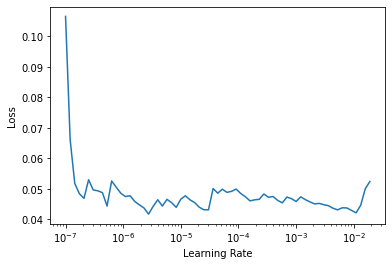

In [10]:
learn.lr_find()

In [11]:
learn.fit_one_cycle(6, lr_max=slice(1e-4,3e-2)).to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,0.641770,1.221586,0.833842,01:19
1,1.052794,0.806569,0.877825,01:19
2,0.564955,0.556710,0.910812,01:19
3,0.328728,0.269393,0.951741,01:19
4,0.179970,0.212696,0.956628,01:19
5,0.108453,0.198304,0.959071,01:19


AttributeError: ignored

In [0]:
learn.save('/content/drive/My Drive/models/flowers-resnet50-pr-128')

In [9]:
learn.load('/content/drive/My Drive/models/flowers-resnet50-pr-128')
# learn.validate()

In [0]:
# Changing the models dataloader to one of bs=64 and size=256*256
learn.dls = get_dls(64, 256)

In [14]:
learn.fine_tune(6, freeze_epochs=3).to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,0.697251,0.548947,0.898595,01:26
1,0.511906,0.334946,0.932193,01:25
2,0.315008,0.227936,0.949297,01:25


epoch,train_loss,valid_loss,accuracy,time
0,0.225961,0.213937,0.956628,01:30
1,0.249909,0.266023,0.943800,01:29
2,0.209535,0.164903,0.960293,01:29
3,0.117149,0.102454,0.974343,01:29
4,0.082840,0.082006,0.979230,01:29
5,0.044550,0.073636,0.982285,01:30


AttributeError: ignored

In [0]:
learn.save('/content/drive/My Drive/models/flowers-resnet50-pr-256')

In [11]:
learn.load('/content/drive/My Drive/models/flowers-resnet50-pr-256')

In [12]:
learn.validate()

(#2) [0.07363569736480713,0.982284665107727]

In [18]:
learn.fine_tune(3).to_fp16()

epoch,train_loss,valid_loss,accuracy,time
0,0.035751,0.072570,0.981063,01:26


epoch,train_loss,valid_loss,accuracy,time
0,0.095311,0.285236,0.949297,01:30
1,0.129132,0.136486,0.973732,01:30
2,0.073678,0.112332,0.974343,01:30


AttributeError: ignored

In [20]:
learn.validate()

(#2) [0.07363569736480713,0.982284665107727]

In [0]:
learn.recorder.plot_loss()

SuggestedLRs(lr_min=3.0199516913853586e-06, lr_steep=9.12010818865383e-07)

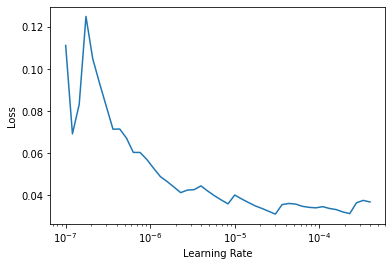

In [27]:
learn.lr_find()

In [28]:
learn.unfreeze()
learn.fit_one_cycle(3, lr_max=slice(4e-6, 3e-4)).to_fp16()

KeyboardInterrupt: ignored

In [34]:
learn.validate()

(#2) [0.04582928493618965,0.9877825379371643]

SuggestedLRs(lr_min=1.9054606673307718e-05, lr_steep=6.309573450380412e-07)

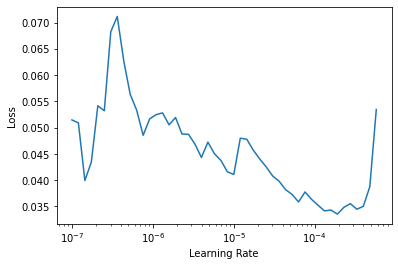

In [24]:
learn.lr_find()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(5, lr_max=slice(9e-4,9e-3)).to_fp16()

KeyboardInterrupt: ignored

In [0]:
# Changing the models dataloader to one of bs=64 and size=500*500
learn.dls = get_dls(32, 500)

In [42]:
learn.fine_tune(6, freeze_epochs=3).to_fp16()

RuntimeError: ignored

In [0]:
learn.save('/content/drive/My Drive/models/flowers-resnet50-pr-500')

In [19]:
learn.load('/content/drive/My Drive/models/flowers-resnet50-pr-500')

In [20]:
learn.validate()

(#2) [0.04451841115951538,0.98289555311203]

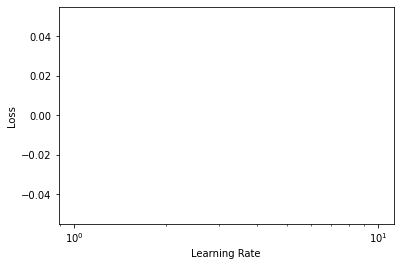

In [14]:
learn.lr_find()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(6, lr_max=slice(1e-5,3e-4)).to_fp16()

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: ignored

In [0]:
learn.save('/content/drive/My Drive/models/flowers-resnet50-pr-500-lr_find')

In [0]:
learn.load('/content/drive/My Drive/models/flowers-resnet50-pr-500-lr_find')

FileNotFoundError: ignored

## Test Time Augmentation

In [13]:
preds,targs = learn.tta()
accuracy(preds, targs).item()

IndexError: ignored